In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st

Проект анализа данных магазина «Стримчик» Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [2]:
df = pd.read_csv('/datasets/games.csv')


In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### предобработка данных 
- Замените названия столбцов (приведите к нижнему регистру)
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; 
- Обработайте пропуски при необходимости: 
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.duplicated().any()

False

In [7]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [8]:
df['user_score'] = df['user_score'].replace('tbd',np.nan)

In [9]:
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']

In [10]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,74.09
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


In [11]:
df[df.duplicated(subset =['name','platform'],keep=False)].sort_values('year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.31
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.15
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.25
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,0.51
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.33
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.41
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.06
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48


In [12]:
df = df.drop_duplicates(subset =['name','platform'],keep = 'last')

####  исследовательский анализ данных

- сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
-  как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

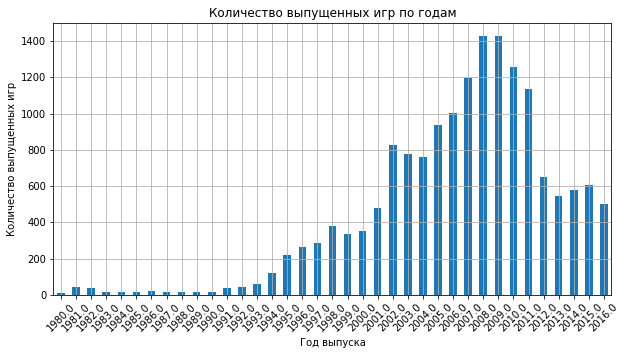

In [13]:
df.groupby('year_of_release')['genre'].count().plot(kind = 'bar', figsize = (10,5), grid = True)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество выпущенных игр')
plt.xticks(rotation = 45);

Я не думаю, что для прогноза на 2017 год важны данные за все периоды. Мне кажется, что вполне достаточно будет последних лет, тенденции в игровой индустрии меняются очень быстро и данные 20 летней давности в любом случае не будут релевантны.

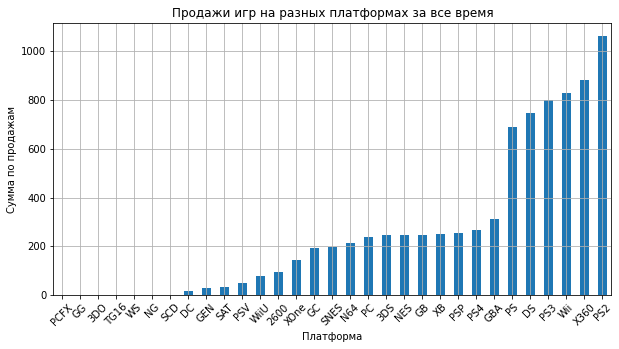

In [14]:
df.groupby('platform')['total_sales'].sum().sort_values().plot(kind = 'bar', figsize = (10,5), grid = True)
plt.title('Продажи игр на разных платформах за все время')
plt.xlabel('Платформа')
plt.ylabel('Сумма по продажам')
plt.xticks(rotation = 45);

платформы с наибольшими суммарными продажами - X360, PS2

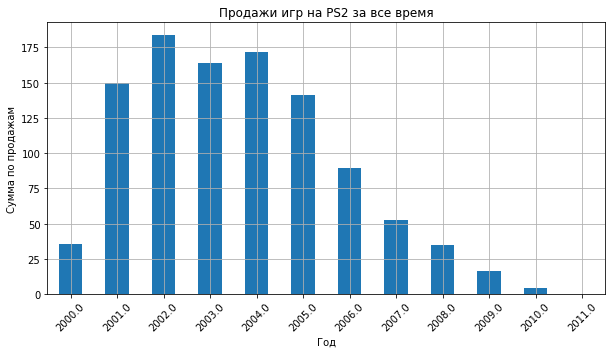

In [15]:
df[df['platform'] == 'PS2'].groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar', figsize = (10,5), grid = True)
plt.title('Продажи игр на PS2 за все время')
plt.xlabel('Год')
plt.ylabel('Сумма по продажам')
plt.xticks(rotation = 45);

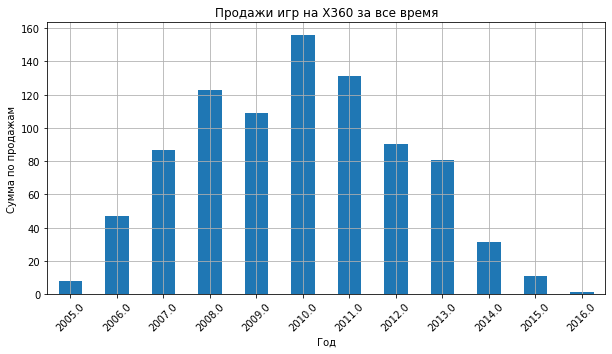

In [16]:
df[df['platform'] == 'X360'].groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar', figsize = (10,5), grid = True)
plt.title('Продажи игр на X360 за все время')
plt.xlabel('Год')
plt.ylabel('Сумма по продажам')
plt.xticks(rotation = 45);

- Из графиков можно сделать вывод, что платформа набирает популярность в первые 5 лет своей популярности, а в следующие 5 плавно ее теряет, так жизнь платформы составляет около 10 лет
- Исходя из этого можно предположить, что если взять данные в предыдущие 3 года мы увидим платформы которые набирают популярность, и через 2 года будут на пике. так мы сможем снизить влияние все еще популярных платформ, чья популяность снижается


In [17]:
df_act = df.query('year_of_release>=2013')

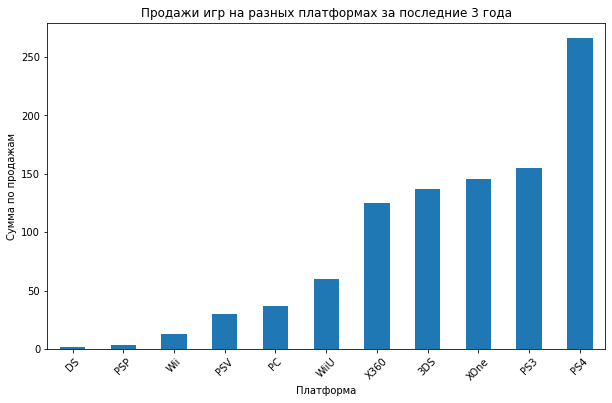

In [18]:
df_act.groupby('platform')['total_sales'].sum().sort_values().plot(kind = 'bar',figsize = (10,6))
plt.title('Продажи игр на разных платформах за последние 3 года')
plt.xlabel('Платформа')
plt.ylabel('Сумма по продажам')
plt.xticks(rotation = 45);

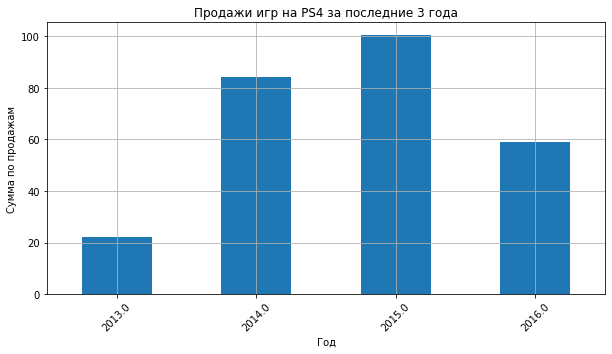

In [19]:
df_act[df_act['platform'] == 'PS4'].groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar', figsize = (10,5), grid = True)
plt.title('Продажи игр на PS4 за последние 3 года')
plt.xlabel('Год')
plt.ylabel('Сумма по продажам')
plt.xticks(rotation = 45);

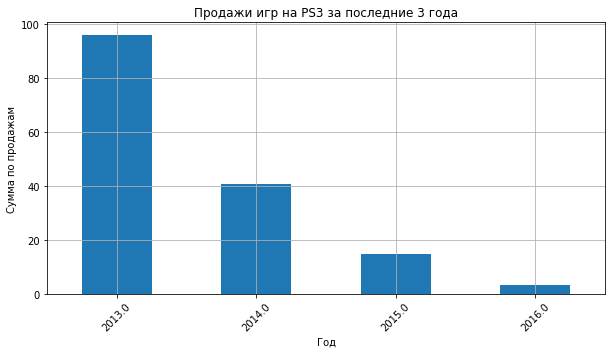

In [20]:
df_act[df_act['platform'] == 'PS3'].groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar', figsize = (10,5), grid = True)
plt.title('Продажи игр на PS3 за последние 3 года')
plt.xlabel('Год')
plt.ylabel('Сумма по продажам')
plt.xticks(rotation = 45);

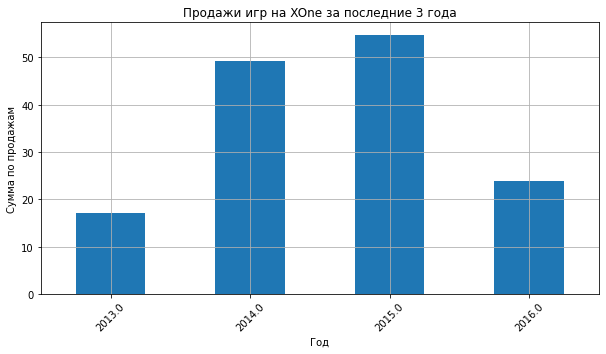

In [21]:
df_act[df_act['platform'] == 'XOne'].groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar', figsize = (10,5), grid = True)
plt.title('Продажи игр на XOne за последние 3 года')
plt.xlabel('Год')
plt.ylabel('Сумма по продажам')
plt.xticks(rotation = 45);

3 наиболее популярные платформы - это PS3 PS4 XOne, при этом популярность PS3 явно идет на спад, что неудивительно - выпущена более новая версия платформы, не стоит брать ее в расчет, то есть я бы обращал внимание на 2 платформы - PS4 XOne, можно заметить, что в последний год суммы продаж падают, но это характерно для всех платформ за последние несколько лет (кроме того данные за 2016 год неполные )

##### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<AxesSubplot:>

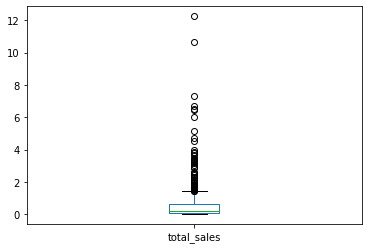

In [22]:
df_act.query('platform == "PS4"')['total_sales'].plot(kind = 'box')


<AxesSubplot:>

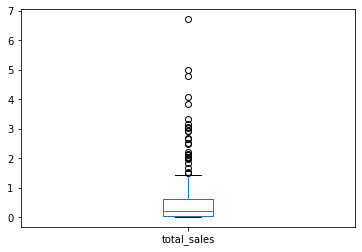

In [23]:
df_act.query('platform == "XOne"')['total_sales'].plot(kind = 'box')


In [24]:
df_act.groupby('platform')['total_sales'].sum().sort_values(ascending = False).head(5)

platform
PS4     265.79
PS3     154.66
XOne    145.05
3DS     136.97
X360    124.69
Name: total_sales, dtype: float64

(0.0, 1.5)

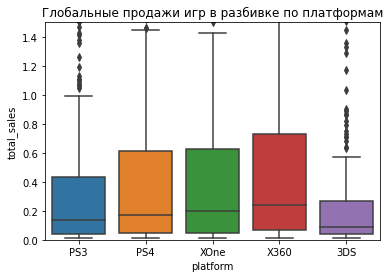

In [25]:
sns.boxplot(data=df_act.query('platform.str.contains("PS4|PS3|XOne|3DS|X360")').sort_values(by = 'total_sales'), x='platform', y='total_sales')
plt.title('Глобальные продажи игр в разбивке по платформам')
plt.ylim(0,1.5)

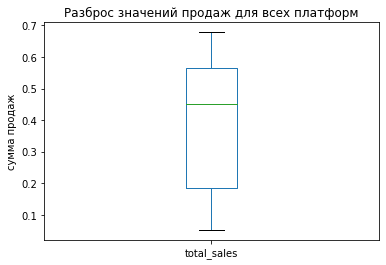

In [26]:
df_act.groupby('platform')['total_sales'].mean().plot(kind = 'box')
plt.title('Разброс значений продаж для всех платформ')
plt.ylabel('сумма продаж');

##### как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [27]:
df_act = df_act.query('user_score != "tbd"')
df_act.critic_score = df_act.critic_score.astype(float)
df_act.user_score = df_act.user_score.astype(float)
df_act = df_act.dropna(subset=['total_sales', 'critic_score','user_score'])

Text(0.5, 1.0, 'Корреляция отзывов пользователей и продаж')

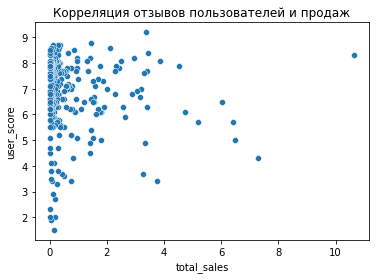

In [28]:
sns.scatterplot(data = df_act.query('platform == "PS4"'), x='total_sales', y ='user_score')
plt.title('Корреляция отзывов пользователей и продаж')

Text(0.5, 1.0, 'Корреляция отзывов критиков и продаж')

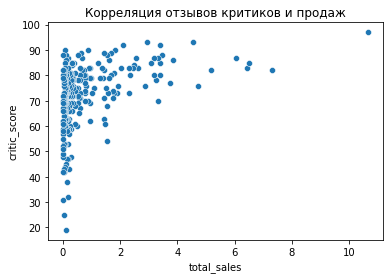

In [29]:
sns.scatterplot(data = df_act.query('platform == "PS4"'), x='total_sales', y ='critic_score')
plt.title('Корреляция отзывов критиков и продаж')

In [30]:
print('Корреляция между total_sales и critic_score = ',np.corrcoef(df_act.query('platform == "PS4"')['total_sales'],
                                     df_act.query('platform == "PS4"')['critic_score'])[1][0])

Корреляция между total_sales и critic_score =  0.40522336661501335


In [31]:
print('Корреляция между total_sales и user_score = ',np.corrcoef(df_act.query('platform == "PS4"')['total_sales'],
                                     df_act.query('platform == "PS4"')['user_score'])[1][0])

Корреляция между total_sales и user_score =  -0.03292287016409416


- # Исходя из анализа корреляции есть средне-слабая зависимость продаж от  отзывов критиков и отсутствует корреляция между отзывами пользователей и продажами

In [32]:
print('XOne Корреляция между total_sales и critic_score = ',np.corrcoef(df_act.query('platform == "XOne"')['total_sales'],
                                     df_act.query('platform == "XOne"')['critic_score'])[1][0])

XOne Корреляция между total_sales и critic_score =  0.4106565329614494


In [33]:
print('XOne Корреляция между total_sales и critic_score = ',np.corrcoef(df_act.query('platform == "XOne"')['total_sales'],
                                     df_act.query('platform == "XOne"')['user_score'])[1][0])

XOne Корреляция между total_sales и critic_score =  -0.09373712936460944


In [34]:
print('PS3 Корреляция между total_sales и critic_score = ',np.corrcoef(df_act.query('platform == "PS3"')['total_sales'],
                                     df_act.query('platform == "PS3"')['user_score'])[1][0])

PS3 Корреляция между total_sales и critic_score =  0.021034492018154244


In [35]:
print('PS3 Корреляция  между total_sales и critic_score = ',np.corrcoef(df_act.query('platform == "PS3"')['total_sales'],
                                     df_act.query('platform == "PS3"')['critic_score'])[1][0])

PS3 Корреляция  между total_sales и critic_score =  0.33689836826959946


- Во всех случаях очень слабая корреляция между продажами и оценками пользователей и средне-слабая между оценкой критиков и продажами

##### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

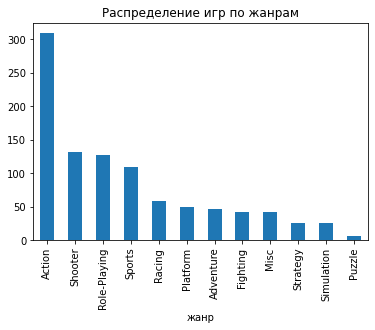

In [36]:
df_act.genre.value_counts().plot(kind = 'bar')
plt.title("Распределение игр по жанрам")
plt.xlabel('жанр');

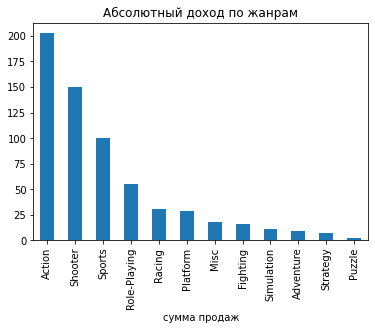

In [37]:
df_act.groupby('genre')['total_sales'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Абсолютный доход по жанрам')
plt.xlabel('сумма продаж');

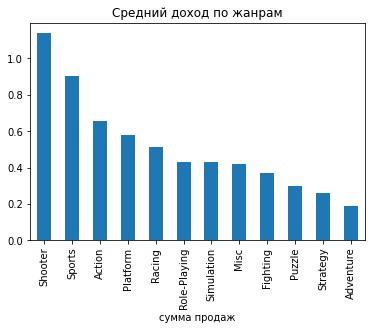

In [38]:
df_act.groupby('genre')['total_sales'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Cредний доход по жанрам')
plt.xlabel('сумма продаж');

- Если смотреть абсолютные продажи то жанр Экшен занимает лидирующие позиции по сумме дохода с продаж в это же время жанр пазл имеет наименьший доход 
- Медианные значения показывают самые высокие значения по направлениям Shooter и Sports, а самое низкое - Adventure.

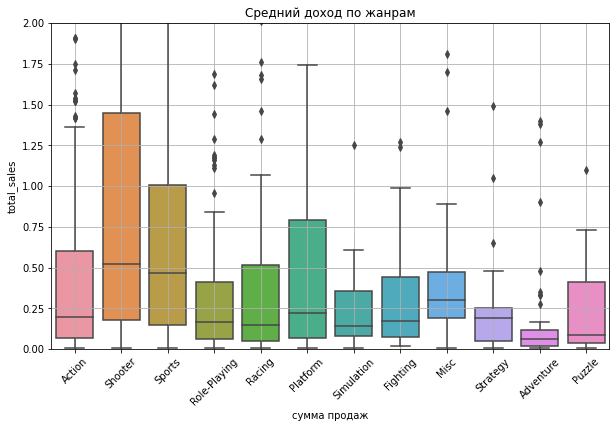

In [39]:
plt.figure(figsize = (10,6))
sns.boxplot(data = df_act, x = 'genre', y = 'total_sales')
plt.title('Cредний доход по жанрам')
plt.grid(True)
plt.xlabel('сумма продаж')
plt.xticks(rotation = 45)
plt.ylim(0,2);

#### Составьте портрет пользователя каждого региона

- Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


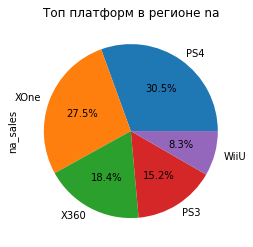

In [40]:
df_act.groupby('platform')['na_sales'].sum().sort_values(ascending = False).head(5).plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Топ платформ в регионе na');

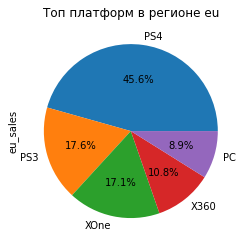

In [41]:
df_act.groupby('platform')['eu_sales'].sum().sort_values(ascending = False).head(5).plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Топ платформ в регионе eu');

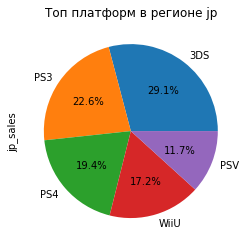

In [42]:
df_act.groupby('platform')['jp_sales'].sum().sort_values(ascending = False).head(5).plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Топ платформ в регионе jp');

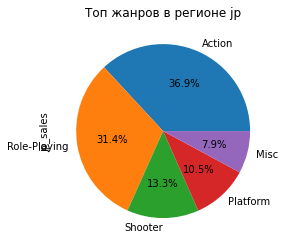

In [43]:
df_act.groupby('genre')['jp_sales'].sum().sort_values(ascending = False).head(5).plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Топ жанров в регионе jp');

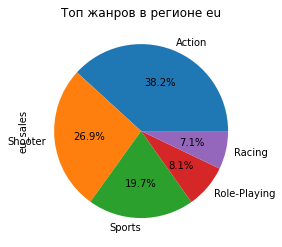

In [44]:
df_act.groupby('genre')['eu_sales'].sum().sort_values(ascending = False).head(5).plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Топ жанров в регионе eu');

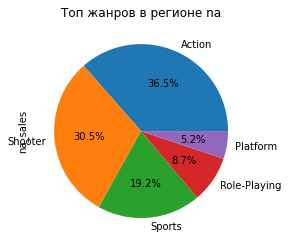

In [45]:
df_act.groupby('genre')['na_sales'].sum().sort_values(ascending = False).head(5).plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Топ жанров в регионе na');

 - Для всех 3 регионов различаются и топ платформ и топ жанров, полагаю это можно объяснить различием культур и доступностью тех или иных игр/платформ

In [46]:
df_act.groupby('rating')[['na_sales',	'eu_sales',	'jp_sales']].sum()

,na_sales,eu_sales,jp_sales
rating,,,
E,65.67,69.18,14.14
E10+,39.01,29.97,5.65
M,152.83,135.48,12.93
T,45.13,38.87,16.54


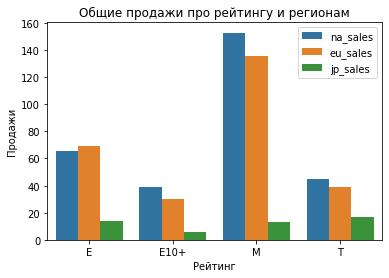

In [47]:
sales_by_rating = df_act.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

sales_by_rating_melted = pd.melt(sales_by_rating, id_vars='rating', var_name='region', value_name='sales')
sns.barplot(data=sales_by_rating_melted, x='rating', y='sales', hue='region')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи')
plt.title('Общие продажи про рейтингу и регионам')
plt.legend()
plt.show()

популярность рейтинга M самая большая для регионов na, eu, для jp - это Т, наименее популярный рейтинг - рейтинг Е10+

#### Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотез о равенстве средних пользовательских рейтингов двух выборок (Xbox One и PC; жанры Action и Sports) можно воспользоваться t-тестом для независимых выборок. Этот критерий подойдет лучше так как мы исследуем 2 различные выборки и наша гипотеза строится вокруг их средних.

Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC
- Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [48]:
alpha = 0.05
df_act['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

t_statistic, p_value = st.ttest_ind(df_act.query('platform == "XOne"')['user_score'].dropna(),
                                       df_act.query('platform == "PC"')['user_score'].dropna())


print("P-Value:", p_value)
if p_value<alpha:
    print("Альтернативная гипотеза не может быть отвергнута - различия статистически значимы")
else:
    print("Нет оснований отвергать H0 - статистически значимые различия не обнаружены")

P-Value: 0.17306926618147322
Нет оснований отвергать H0 - статистически значимые различия не обнаружены


Гипотеза о разности средних пользовательских рейтингов жанров Action и Sports
- Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

In [49]:
t_statistic, p_value = st.ttest_ind(df_act.query('genre == "Action"')['user_score'].dropna(),
                                       df_act.query('genre == "Sports"')['user_score'].dropna())


print("P-Value:", p_value)
if p_value<alpha:
    print("Альтернативная гипотеза не может быть отвергнута - различия статистически значимы")
else:
    print("Нет оснований отвергать H0 - статистически значимые различия не обнаружены")

P-Value: 1.684099430689953e-16
Альтернативная гипотеза не может быть отвергнута - различия статистически значимы


#### общий вывод


- явные дубликаты отсутсвуют, заполнения пропусков не производилось 
- неявные дубликаты по названию и платформе - оставлено последнее значение 
- Платформы  с наибольшими суммарными продажами - X360, PS2
- Количество выпускаемых игр росло с начала 90 до 2008 года после чего стало снижаться
- 3 наиболее популярные платформы - это PS3 PS4 XOne, при этом популярность PS3 явно идет на спад, что неудивительно - выпущена более новая версия платформы, не стоит брать ее в расчет, то есть я бы обращал внимание на 2 платформы - PS4 XOne, можно заметить, что в последний год суммы продаж падают, но это характерно для всех платформ за последние несколько лет (кроме того данные за 2016 год неполные )
- платформа набирает популярность в первые 5 лет своей популярности, а в следующие 5 плавно ее теряет, так жизнь платформы составляет около 10 лет
- Исходя из анализа корреляции есть средне-слабая зависимость продаж от отзывов критиков и отсутствует корреляция между отзывами пользователей и продажами¶
- Если смотреть средние или медианные значниия продаж то жанры shooter, sports занимают лидирующии позиции по доходу с продаж
 - Для всех 3 регионов различаются и топ платформ и топ жанров, полагаю это можно объяснить различием культур и доступностью тех или иных игр/платформ
- Из графика видно, что популярность рейтинга М самая большая(для na, eu), но в целом популярность различных рейтингов специфична для регионов
- Средние пользовательские рейтинги платформ Xbox One и PC не различаются
- Средние пользовательские рейтинги жанров Action и Sports различаются

##### -  Для достижения большего комерческого успеха можно рекомендовать выпуск игр в жанре шутер (лидирует по среднему доходу), для платформы PS4, при этом важнее обращать внимание на отзывы критиков чем на отзывы пользователей, в таком ключе при прочих равных вероятность получить больший доход выше 